In [10]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# Ground truth parameters
m_true = 3
b_true = 10

# Generate data
num_samples = 10000
x = np.random.uniform(-10, 10, num_samples)
noise = np.random.normal(0, 5, num_samples)  # Gaussian noise
y = m_true * x + b_true + noise

# Reshape x for Keras (needs 2D array)
x = x.reshape(-1, 1)


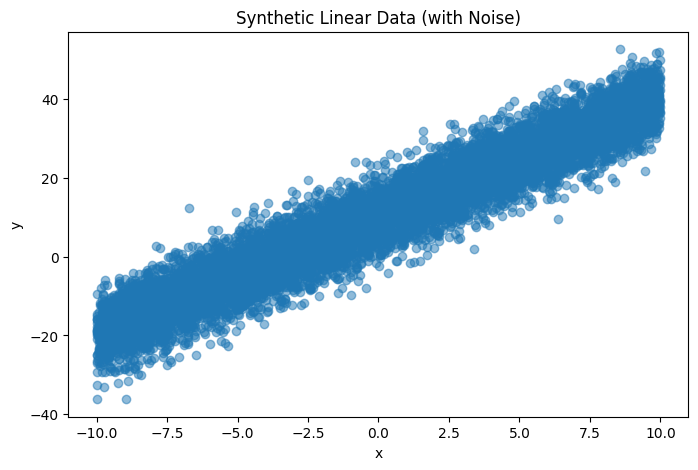

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Data (with Noise)")
plt.show()


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(1, input_shape=(1,))
])


In [13]:
model.compile(
    optimizer='adam',
    loss='mse'
)


In [14]:
history = model.fit(
    x, y,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 193.9853
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 164.8901
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 145.4429
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 122.8196
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 111.8081
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 101.8954
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 95.6398
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 89.0175
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83.8697
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 78.3009
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 76.5053
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69.9352
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65.8859
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64.6113
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━

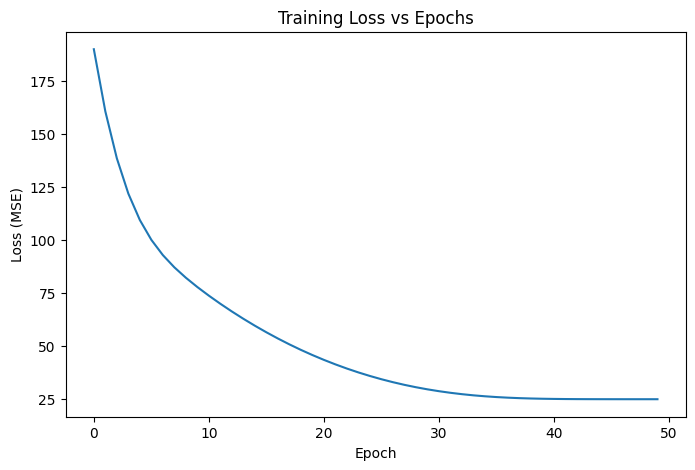

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")
plt.show()


In [16]:
learned_weight, learned_bias = model.layers[0].get_weights()

m_learned = learned_weight[0][0]
b_learned = learned_bias[0]


In [17]:
print(f"True Weight (m): {m_true}")
print(f"Learned Weight (m): {m_learned:.4f}")

print(f"\nTrue Bias (b): {b_true}")
print(f"Learned Bias (b): {b_learned:.4f}")


True Weight (m): 3
Learned Weight (m): 2.9885

True Bias (b): 10
Learned Bias (b): 10.0409


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


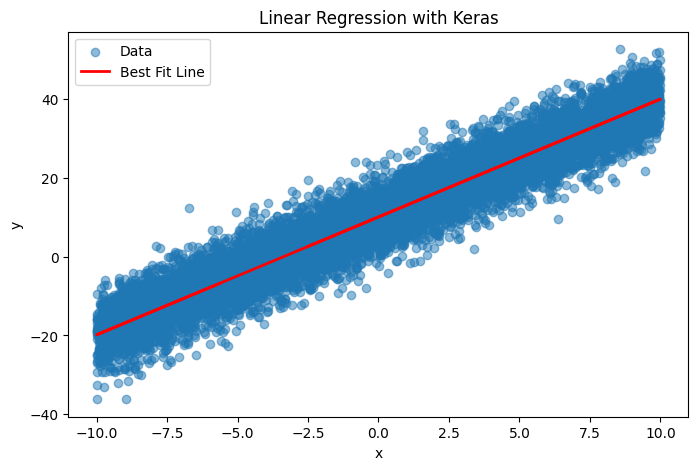

In [18]:
# Generate predictions
y_pred = model.predict(x)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label="Data")
plt.plot(x, y_pred, color='red', linewidth=2, label="Best Fit Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Keras")
plt.legend()
plt.show()
